## Compare the performance of the scikit and the custom decision tree classifiers

Tested on the scikit Iris toy dataset.

## Import of the dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Iris dataset contains 3 classes and 4 features
data = load_iris()
#convert to a dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)
#create the species column
df['Species'] = data.target
#replace this with the actual names
#take the unique number labels (0, 1, 2)
target = np.unique(data.target)
#take the unique word labels (setosa, versicolour, virginica)
target_names = np.unique(data.target_names)
#ctreate a dictionary to convert numbers to words
targets = dict(zip(target, target_names))
#replace number labels with word labels
df['Species'] = df['Species'].replace(targets)
x = df.drop(columns="Species")
y = df["Species"]
feature_names = x.columns
labels = y.unique()

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Split the dataset into training and testing sets

In [2]:
#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Search Space for Hyperparameter Tuning

In [3]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 11))
params['min_samples_split'] = list(range(2, 12))
params['min_samples_leaf'] = list(range(1, 11))
print(params)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


## K-Fold Cross Validation

In [4]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

## Initialize Optimizer

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

search = GridSearchCV(estimator=clf, param_grid=params, cv=cv, scoring ='accuracy', verbose=0)

from my_tree import CustomDecisionTreeClassifier
from fast_parameter_search import MyGridSearchCV

my_clf = CustomDecisionTreeClassifier()

my_search = MyGridSearchCV(my_clf, params, cv=cv)


## Results

In [6]:
# #Scikit Learn Decision Tree
# search.fit(x_train, y_train)
# print("Scikit Learn Decision Tree")
# print("Best score", search.best_score_)
# print("Best parameters", search.best_params_)

# # My Decision Tree
# #Time how long it takes to fit the model
# import time
# start = time.time()
# my_search.fit(x_train, y_train)
# end = time.time()
# print("Time taken to fit the model", end-start)
# print("Custom Decision Tree")
# print("Best score", my_search.best_score)
# print("Best parameters", my_search.best_params)

## Test the Models

## Scikit Decision Tree Classifier

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get the best estimator
# best = search.best_estimator_
best = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
# Fit the model
best.fit(x_train, y_train)
# Predict the test data
y_pred = best.predict(x_test)
# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("test acc", accuracy)
train_acc = accuracy_score(y_train, best.predict(x_train))
print("train acc", train_acc)
# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
matrix_df = pd.DataFrame(confusion)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Custom Decision Tree Classifier

Depth condition: False
Samples condition: False
Unique condition: False
Left sizes
[  1   4   5   9  10  12  17  26  34  38  39  44  50  54  60  66  69  74
  78  81  89  94  97  99 105 106 109 110 111 114 115 116 117 120]
Right sizes
[119 116 115 111 110 108 103  94  86  82  81  76  70  66  60  54  51  46
  42  39  31  26  23  21  15  14  11  10   9   6   5   4   3   0]
Left class counts
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 13. 14. 15. 15. 15.
  15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 27. 28. 29. 29. 30.
  31. 32. 33. 34. 35. 35. 36. 37. 37. 37. 38. 38. 38. 38. 38. 38. 38. 38.
  38. 38. 38. 39. 39. 39. 39. 39. 39. 39. 40. 40. 40. 40. 40. 40. 40. 40.
  40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.
  40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.
  40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.
   3.  3.  3.  3.  3.  3.  3.  3.  3.  3

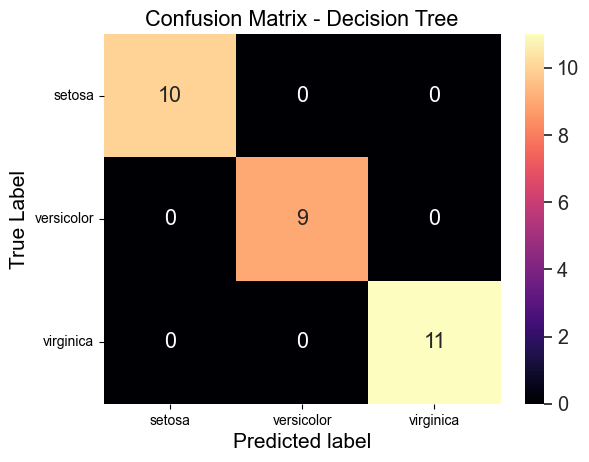

<Figure size 1000x700 with 0 Axes>

In [8]:
# Get the best estimator
# my_best_estimator = my_search.best_estimator
my_best_estimator = CustomDecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
# Fit the model
my_best_estimator.fit(x_train, y_train)
my_best_estimator.draw_tree()
# Predict the test data
y_pred = my_best_estimator.predict(x_test)
# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("test acc", accuracy)
train_acc = accuracy_score(y_train, my_best_estimator.predict(x_train))
print("train acc", train_acc)
# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(confusion)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [9]:
print("Best score", search.best_score_)
print("Best parameters", search.best_params_)

print("Best score", my_search.best_score)
print("Best parameters", my_search.best_params)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'